In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

file_folder = ('train.csv')
titanic_df = pd.read_csv(file_folder)

In [4]:
print("--- Initial Clues (DataFrame Head) ---")
print(titanic_df.head())
print("\n--- Case File Summary (DataFrame Info) ---")
titanic_df.info()
print("\n")

--- Initial Clues (DataFrame Head) ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0        

In [ ]:
df_cleaned = titanic_df.dropna(subset=['Age'])

In [7]:
colors = {0: 'tomato', 1: 'forestgreen'}
survival_colors = df_cleaned['Survived'].map(colors)

In [9]:
# Using a different style for a sleek look
sns.set_style("whitegrid") 
plt.figure(figsize=(12, 8)) 

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

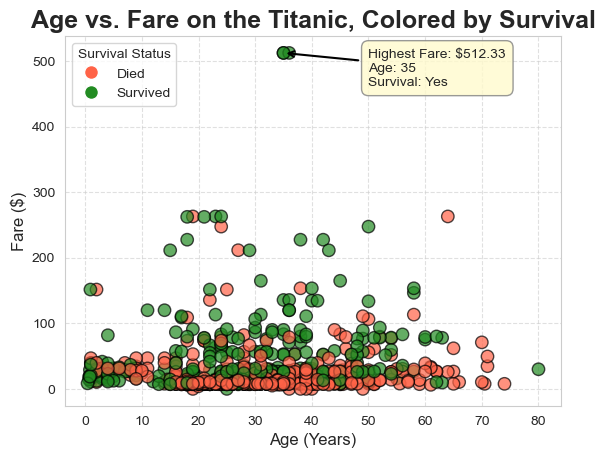

In [ ]:
plt.scatter(df_cleaned['Age'], df_cleaned['Fare'],
            c=survival_colors,
            s=80,
            alpha=0.7,
            edgecolors='k') 

plt.title("Age vs. Fare on the Titanic, Colored by Survival",
          fontsize=18, fontweight='bold')
plt.xlabel("Age (Years)", fontsize=12)
plt.ylabel("Fare ($)", fontsize=12)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Died',
               markerfacecolor='tomato', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Survived',
               markerfacecolor='forestgreen', markersize=10)
]
plt.legend(handles=legend_elements, title='Survival Status', fontsize=10)


most_expensive_ticket = df_cleaned.loc[df_cleaned['Fare'].idxmax()]
plt.annotate(
    f"Highest Fare: ${most_expensive_ticket['Fare']:.2f}\
     \nAge: {int(most_expensive_ticket['Age'])}\
     \nSurvival: {'Yes' if most_expensive_ticket['Survived'] else 'No'}",
    xy=(most_expensive_ticket['Age'], most_expensive_ticket['Fare']),
    xytext=(most_expensive_ticket['Age'] + 15, 
            most_expensive_ticket['Fare'] - 50),
    textcoords='data',
    arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
    bbox=dict(boxstyle='round,pad=0.5', facecolor='lemonchiffon',
              alpha=0.8, edgecolor='gray')
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()